In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

# <font color="Blue">【問題1】コンペティション内容の把握</font>

## Home Creditはどのような企業？
### <font color="Tomato">オランダに本社を置く国際的なノンバンク金融機関</font>  
### <font color="Tomato">10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への貸付に重点を置いている</font>


## このコンペティションでは何を予測する？
### <font color="Tomato">個人のクレジットの情報や以前の応募情報などから、各データが債務不履行になるかどうかを予測する</font>

## それを予測することで企業が得られるメリットは何？
### <font color="Tomato">債務不履行のリスクを予測することができる</font>

# <font color="Blue">【問題2】データの概観の把握</font>

## .head()、.info()、describe()などを使う

In [59]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### データ結果：<font color="Tomato">「application_train.csv」の項目数は「122」、目的変数は「TARGET」</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### データ結果： <font color="Tomato">データタイプは「float」が65件、「int」が41件、「object」が16件</font>

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### データ結果： <font color="Tomato">「object」の16件を除くデータを算出</font>

## 欠損値の有無を見る

In [5]:
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
NONLIVINGARE

In [6]:
ser_missing_sum = df.isnull().sum() # 欠損値の合計を算出
ser_missing_ratio = ser_missing_sum/len(df) # 欠損値の割合を算出
df_missing = pd.concat((ser_missing_sum, ser_missing_ratio),axis=1,sort=False) # 欠損値の合計と割合を結合
df_missing = df_missing.rename(columns={0:'Total',1:'missing_ratio'}) # 列名を変更
df_missing



,Total,missing_ratio
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039


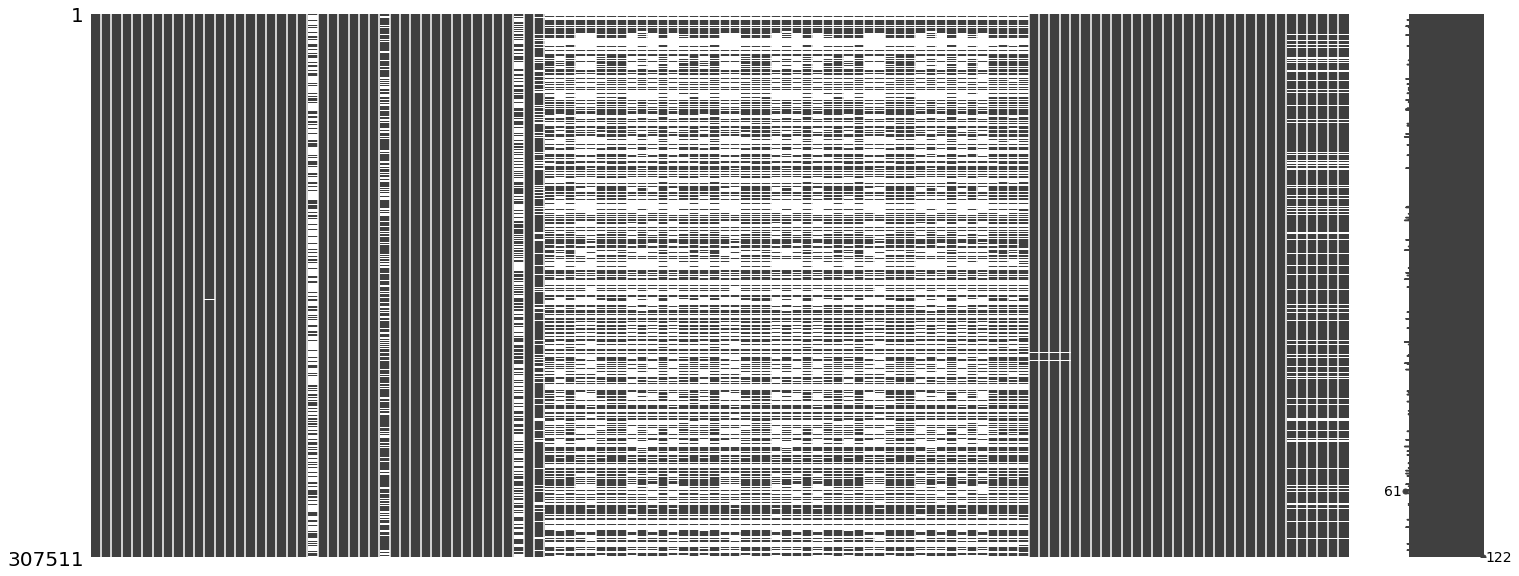

In [7]:
# 欠損値を視覚化
msno.matrix(df)

### データ結果： <font color="Tomato">欠損値を多く含む項目があることが分かる</font>

## クラスごとのデータ数をグラフに出す

0    282686
1     24825
Name: TARGET, dtype: int64


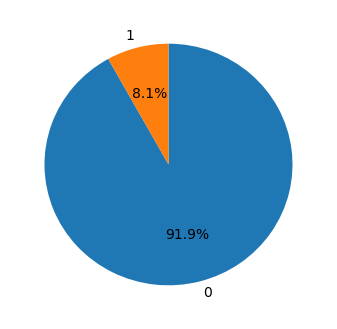

In [8]:
print(df['TARGET'].value_counts())
plt.figure(figsize=(4, 4), dpi=100)
plt.pie(df['TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.1f%%")
plt.show()

### データ結果： <font color="Tomato">目的変数の値は「０」が「91.9%」、「１」が「8.1%」</font>

# <font color="Blue">【問題3】課題設定</font>

## 課題
### <font color="Tomato">① 欠損値の処理</font>
### <font color="Tomato">② 質的データと量的データの確認</font>
### <font color="Tomato">③ 目的変数と関係があると思われる説明変数を分析</font>
## 疑問
### <font color="Tomato">「DAYS_BIRTH」などの項目が「負の値」だがこれはどのように解釈すれば良いのか？</font>  
### <font color="Tomato">　項目内の値「XNA」「XAP」の意味は？</font>

# <font color="Blue">【問題4】データ探索</font>

## 「DAYS_BIRTH」などの項目が「負の値」だがこれはどのように解釈すれば良いのか？
### <font color="Tomato">　「DAYS_BIRTH」の値は例えば「-9461」なら誕生日は起算点から「9461日前」となる（起算点は考慮しなくていい）</font>

## 　項目内の値「XNA」「XAP」の意味は？
### 　　<font color="Tomato">項目内の値「XNA」「XAP」は「na」を意味する</font>

## ① 欠損値の処理
欠損値の多い目的変数は削除する　→　欠損値が１０件以上の目的変数を削除  
欠損値がある「行」を削除する

In [87]:
ser_missing_sum = df.isnull().sum() #欠損値の合計を算出
tolerance_columns = ser_missing_sum[ser_missing_sum < 10].index # 10つ未満の欠損値がある特徴量の列名を取得
df_preprocessed = df[tolerance_columns] #10つ以上欠損値がある特徴量以外を抽出
df_preprocessed.shape

(307511, 57)

In [77]:
df_preprocessed = df_preprocessed.dropna() # 欠損値が行を削除
df_preprocessed.shape

(307508, 57)

### データ結果： <font color="Tomato">欠損値を除外後の項目数は「57」、行数は「307508」</font>

## ② 質的データと量的データの確認
　各項目を「量的データ」か「質的データ」か確認する

In [96]:
#各項目のデータ型と内容を確認
for column in df_preprocessed.columns:
    print("『{}』：[データ型]：{} [データ内容]：{}".format(column,df_preprocessed[column].dtype,df_preprocessed[column].unique()))

『SK_ID_CURR』：[データ型]：int64 [データ内容]：[100002 100003 100004 ... 456253 456254 456255]
『TARGET』：[データ型]：int64 [データ内容]：[1 0]
『NAME_CONTRACT_TYPE』：[データ型]：object [データ内容]：['Cash loans' 'Revolving loans']
『CODE_GENDER』：[データ型]：object [データ内容]：['M' 'F' 'XNA']
『FLAG_OWN_CAR』：[データ型]：object [データ内容]：['N' 'Y']
『FLAG_OWN_REALTY』：[データ型]：object [データ内容]：['Y' 'N']
『CNT_CHILDREN』：[データ型]：int64 [データ内容]：[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
『AMT_INCOME_TOTAL』：[データ型]：float64 [データ内容]：[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
『AMT_CREDIT』：[データ型]：float64 [データ内容]：[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
『NAME_INCOME_TYPE』：[データ型]：object [データ内容]：['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
『NAME_EDUCATION_TYPE』：[データ型]：object [データ内容]：['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
『NAME_FAMILY_STATUS』：[データ型]：object [データ内容]：['Single / no

### データ結果： <font color="Tomato">欠損値を除外後の項目数は「57」、行数は「307508」、データの種類は以下の通り</font>

<font color="Blue">量的データ：</font>SK_ID_CURR  
<font color="Blue">質的データ：「名義尺度」</font>TARGET  
<font color="Blue">質的データ：「名義尺度」</font>NAME_CONTRACT_TYPE  
<font color="Blue">質的データ：「名義尺度」</font>CODE_GENDER  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_OWN_CAR  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_OWN_REALTY  
<font color="Blue">量的データ：</font>CNT_CHILDREN  
<font color="Blue">量的データ：</font>AMT_INCOME_TOTAL  
<font color="Blue">量的データ：</font>AMT_CREDIT  
<font color="Blue">質的データ：「名義尺度」</font>NAME_INCOME_TYPE  
<font color="Blue">質的データ：「名義尺度」</font>NAME_EDUCATION_TYPE  
<font color="Blue">質的データ：「名義尺度」</font>NAME_FAMILY_STATUS  
<font color="Blue">質的データ：「名義尺度」</font>NAME_HOUSING_TYPE  
<font color="Blue">量的データ：</font>REGION_POPULATION_RELATIVE  
<font color="Blue">量的データ：</font>DAYS_BIRTH  
<font color="Blue">量的データ：</font>DAYS_EMPLOYED  
<font color="Blue">量的データ：</font>DAYS_REGISTRATION  
<font color="Blue">量的データ：</font>DAYS_ID_PUBLISH  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_MOBIL  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_EMP_PHONE  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_WORK_PHONE  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_CONT_MOBILE  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_PHONE  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_EMAIL  
<font color="Blue">量的データ：</font>CNT_FAM_MEMBERS  
<font color="Blue">質的データ：「順序尺度」</font>REGION_RATING_CLIENT  
<font color="Blue">質的データ：「順序尺度」</font>REGION_RATING_CLIENT_W_CITY  
<font color="Blue">質的データ：「名義尺度」</font>WEEKDAY_APPR_PROCESS_START  
<font color="Blue">量的データ：</font>HOUR_APPR_PROCESS_START  
<font color="Blue">質的データ：「名義尺度」</font>REG_REGION_NOT_LIVE_REGION  
<font color="Blue">質的データ：「名義尺度」</font>REG_REGION_NOT_WORK_REGION  
<font color="Blue">質的データ：「名義尺度」</font>LIVE_REGION_NOT_WORK_REGION  
<font color="Blue">質的データ：「名義尺度」</font>REG_CITY_NOT_LIVE_CITY  
<font color="Blue">質的データ：「名義尺度」</font>REG_CITY_NOT_WORK_CITY  
<font color="Blue">質的データ：「名義尺度」</font>LIVE_CITY_NOT_WORK_CITY  
<font color="Blue">質的データ：「名義尺度」</font>ORGANIZATION_TYPE  
<font color="Blue">量的データ：</font>DAYS_LAST_PHONE_CHANGE  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_2  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_3  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_4  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_5  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_6  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_7  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_8  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_9  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_10  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_11  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_12  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_13  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_14  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_15  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_16  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_17  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_18  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_19  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_20  
<font color="Blue">質的データ：「名義尺度」</font>FLAG_DOCUMENT_21

## ③ 目的変数と関係があると思われる説明変数を分析

### 欠損値を省いたデータで相関係数を求める

In [84]:
corr_df = df_preprocessed.corr()
corr_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002111,-0.001134,-0.001817,-0.000346,0.000843,-0.001489,0.001363,-0.000972,-0.000383,...,-0.001045,0.000896,-0.001078,0.002603,-0.000725,0.001450,0.000565,0.000167,0.001073,0.000282
TARGET,-0.002111,1.000000,0.019186,-0.003981,-0.030370,-0.037228,0.078243,-0.044933,0.041976,0.051459,...,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007943,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001134,0.019186,1.000000,0.012884,0.002144,-0.025574,0.330947,-0.239821,0.183399,-0.028017,...,0.000293,0.003944,-0.005460,0.003609,0.010662,0.000773,0.004052,0.000864,0.000988,-0.002450
AMT_INCOME_TOTAL,-0.001817,-0.003981,0.012884,1.000000,0.156870,0.074797,0.027259,-0.064222,0.027803,0.008510,...,0.002540,0.022747,0.020708,0.010793,0.007269,0.002231,0.003137,0.002408,0.000242,-0.000589
AMT_CREDIT,-0.000346,-0.030370,0.002144,0.156870,1.000000,0.099737,-0.055432,-0.066839,0.009621,-0.006571,...,0.003857,0.052429,0.048828,0.032252,0.061925,0.011743,0.034365,0.021082,0.031023,-0.016148
REGION_POPULATION_RELATIVE,0.000843,-0.037228,-0.025574,0.074797,0.099737,1.000000,-0.029579,-0.003980,-0.053821,-0.003994,...,-0.000404,0.031186,0.032202,0.009446,0.006313,0.007414,0.013396,0.002364,-0.000045,0.003437
DAYS_BIRTH,-0.001489,0.078243,0.330947,0.027259,-0.055432,-0.029579,1.000000,-0.615864,0.331911,0.272687,...,0.000236,0.026333,0.030734,0.012953,0.024046,0.007877,0.044446,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001363,-0.044933,-0.239821,-0.064222,-0.066839,-0.003980,-0.615864,1.000000,-0.210240,-0.272378,...,-0.001225,-0.025779,-0.023384,-0.014285,-0.042905,-0.007188,-0.040388,-0.010040,-0.010136,-0.008396
DAYS_REGISTRATION,-0.000972,0.041976,0.183399,0.027803,0.009621,-0.053821,0.331911,-0.210240,1.000000,0.101895,...,0.001682,0.015470,0.011636,0.008195,0.025935,0.002102,0.017042,0.004764,0.006971,0.003859
DAYS_ID_PUBLISH,-0.000383,0.051459,-0.028017,0.008510,-0.006571,-0.003994,0.272687,-0.272378,0.101895,1.000000,...,-0.002193,0.003049,0.008710,0.000158,0.002782,0.004804,0.014041,0.000903,0.000070,0.017246


### 目的変数「TARGET」との相関係数が高い説明変数を確認する

In [13]:
corr_df['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078243
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051459
REG_CITY_NOT_WORK_CITY         0.050996
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044342
DAYS_REGISTRATION              0.041976
LIVE_CITY_NOT_WORK_CITY        0.032520
FLAG_WORK_PHONE                0.028526
CNT_CHILDREN                   0.019186
CNT_FAM_MEMBERS                0.009308
REG_REGION_NOT_WORK_REGION     0.006946
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002824
FLAG_CONT_MOBILE               0.000370
FLAG_DOCUMENT_20               0.000215
FLAG_DOCUMENT_5               -0.000308
FLAG_DOCUMENT_12              -0.000756
FLAG_DOCUMENT_19              -0.001358


### データ結果： 
### <font color="Tomato">最も相関係数が高いのは「DAYS_BIRTH」で「0.078243」となっている</font>  
### <font color="Tomato">しかし、この相関係数はかなり低いため相関係数があるとは言えない</font>

### 目的変数「TARGET」と最も相関係数が高い説明変数「DAYS_BIRTH」の関係をグラフにして確認する

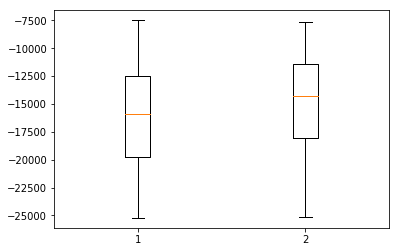

In [97]:
# 箱ひげグラフで確認
plt.boxplot([df.loc[df['TARGET']==0,'DAYS_BIRTH'],df.loc[df['TARGET']==1,'DAYS_BIRTH']])
plt.show()

### データ結果： <font color="Tomato">上記の箱ひげグラフでもあまり相関関係があると見受けられない</font>

### 質的データの分析が必要？
### <font color="Tomato">上記の結果より相関関係がありそうな項目がない、また相関係数は数値データ同士でしか求めることができないので、数値以外の質的データにも着目して分析をする</font>  
## ①　性別「CODE_GENDER」を基準に分析


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


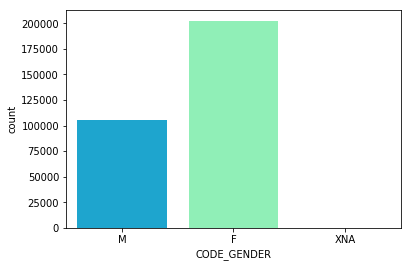

In [114]:
# 性別「CODE_GENDER」のユニークな要素の個数をグラフに描画
print(df_preprocessed['CODE_GENDER'].value_counts())
sns.countplot('CODE_GENDER', data=df_preprocessed, palette='rainbow')

### データ結果：<font color="Tomato">男女比はほぼ「 １ : ２ 」である</font>  

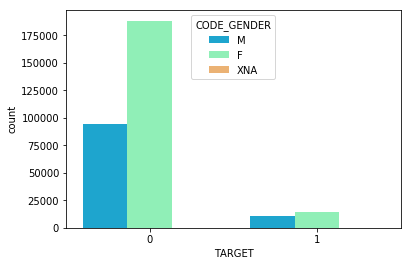

In [111]:
# 目的変数「TARGET」と性別「CODE_GENDER」の関係をグラフで描画
sns.countplot('TARGET', data=df_preprocessed, hue='CODE_GENDER',palette='rainbow')

### データ結果：<font color="Tomato">男女比が異なるためデータ数では比較できない</font>  

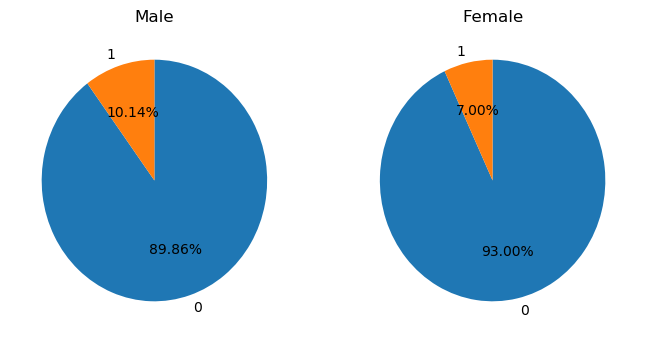

In [150]:
# 男女別の「TARGET」の要素の割合をグラフに描画

#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(row, col, 1)
plt.title('Male')
plt.pie(df_preprocessed.loc[df_preprocessed['CODE_GENDER']=='M','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 2)
plt.title('Female')
plt.pie(df_preprocessed.loc[df_preprocessed['CODE_GENDER']=='F','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.show()

### データ結果：<font color="Tomato">債務不履行の割合は「男性」の方が若干、高いことが分かる</font>  

## ②　収入の種類「NAME_INCOME_TYPE」を基準に分析

In [165]:
# 収入の種類「NAME_INCOME_TYPE」の要素ごとに目的変数「TARGET」の要素の個数を表示
for column in df_preprocessed['NAME_INCOME_TYPE'].unique():
    print("NAME_INCOME_TYPE： {}".format(column))
    print(df_preprocessed.loc[df_preprocessed['NAME_INCOME_TYPE']==column,'TARGET'].value_counts())
    print('\n')

NAME_INCOME_TYPE： Working
0    143550
1     15224
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： State servant
0    20454
1     1249
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： Commercial associate
0    66257
1     5360
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： Pensioner
0    52380
1     2982
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： Unemployed
0    14
1     8
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： Student
0    18
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： Businessman
0    10
Name: TARGET, dtype: int64


NAME_INCOME_TYPE： Maternity leave
0    3
1    2
Name: TARGET, dtype: int64




### データ結果：
### <font color="Tomato">「Unemployed」「Student」「Businessman」「Maternity leave」はデータ数自体が少ないので分析対象外とする</font>  

([<matplotlib.patches.Wedge at 0x1a2fa065c0>,
 [Text(0.185252,-1.08429,'0'), Text(-0.185252,1.08429,'1')],
 [Text(0.101047,-0.59143,'94.61%'), Text(-0.101047,0.59143,'5.39%')])

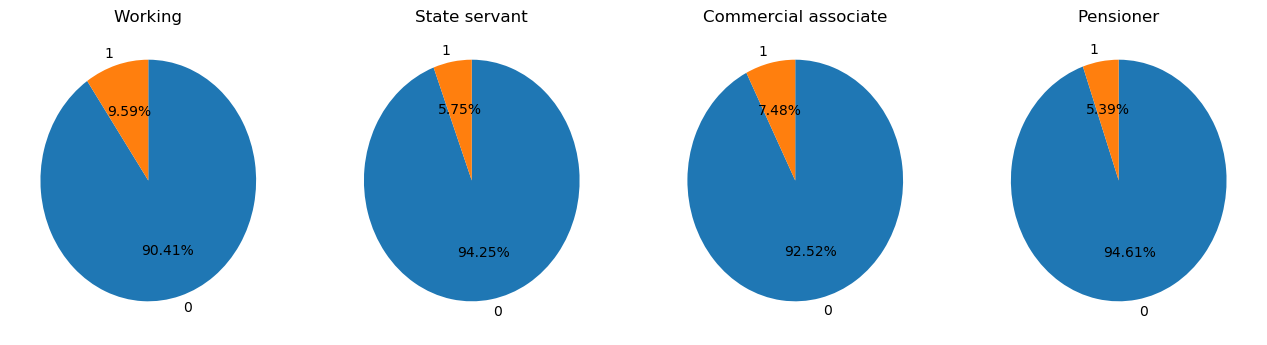

In [168]:
# 収入の種類「NAME_INCOME_TYPE」の要素ごとに「TARGET」の要素の割合をグラフに描画

#1行 × 4列のグラフを設定
row = 1
col  = 4

plt.figure(figsize=(16, 4), dpi=100)

plt.subplot(row, col, 1)
plt.title('Working')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_INCOME_TYPE']=='Working','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 2)
plt.title('State servant')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_INCOME_TYPE']=='State servant','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 3)
plt.title('Commercial associate')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_INCOME_TYPE']=='Commercial associate','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 4)
plt.title('Pensioner')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_INCOME_TYPE']=='Pensioner','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

### データ結果：
### <font color="Tomato">収入の種類「NAME_INCOME_TYPE」では「'Pensioner」「State servant」「Commercial associate」「Working」の順に債務不履行の割合が低いことが分かる</font>  

## ③　学歴の種類「NAME_EDUCATION_TYPE」を基準に分析

In [169]:
# 学歴の種類「NAME_EDUCATION_TYPE」の要素ごとに目的変数「TARGET」の要素の個数を表示
for column in df_preprocessed['NAME_EDUCATION_TYPE'].unique():
    print("NAME_EDUCATION_TYPE： {}".format(column))
    print(df_preprocessed.loc[df_preprocessed['NAME_EDUCATION_TYPE']==column,'TARGET'].value_counts())
    print('\n')

NAME_EDUCATION_TYPE： Secondary / secondary special
0    198867
1     19524
Name: TARGET, dtype: int64


NAME_EDUCATION_TYPE： Higher education
0    70854
1     4009
Name: TARGET, dtype: int64


NAME_EDUCATION_TYPE： Incomplete higher
0    9405
1     872
Name: TARGET, dtype: int64


NAME_EDUCATION_TYPE： Lower secondary
0    3399
1     417
Name: TARGET, dtype: int64


NAME_EDUCATION_TYPE： Academic degree
0    161
1      3
Name: TARGET, dtype: int64




### データ結果：
### <font color="Tomato">「Academic degree」はデータ数自体が少ないのでデータとしての価値が低いことに留意する</font>  

([<matplotlib.patches.Wedge at 0x1a1cbdcda0>,
 [Text(0.0631801,-1.09818,'0'), Text(-0.0631801,1.09818,'1')],
 [Text(0.0344619,-0.599009,'98.17%'), Text(-0.0344619,0.599009,'1.83%')])

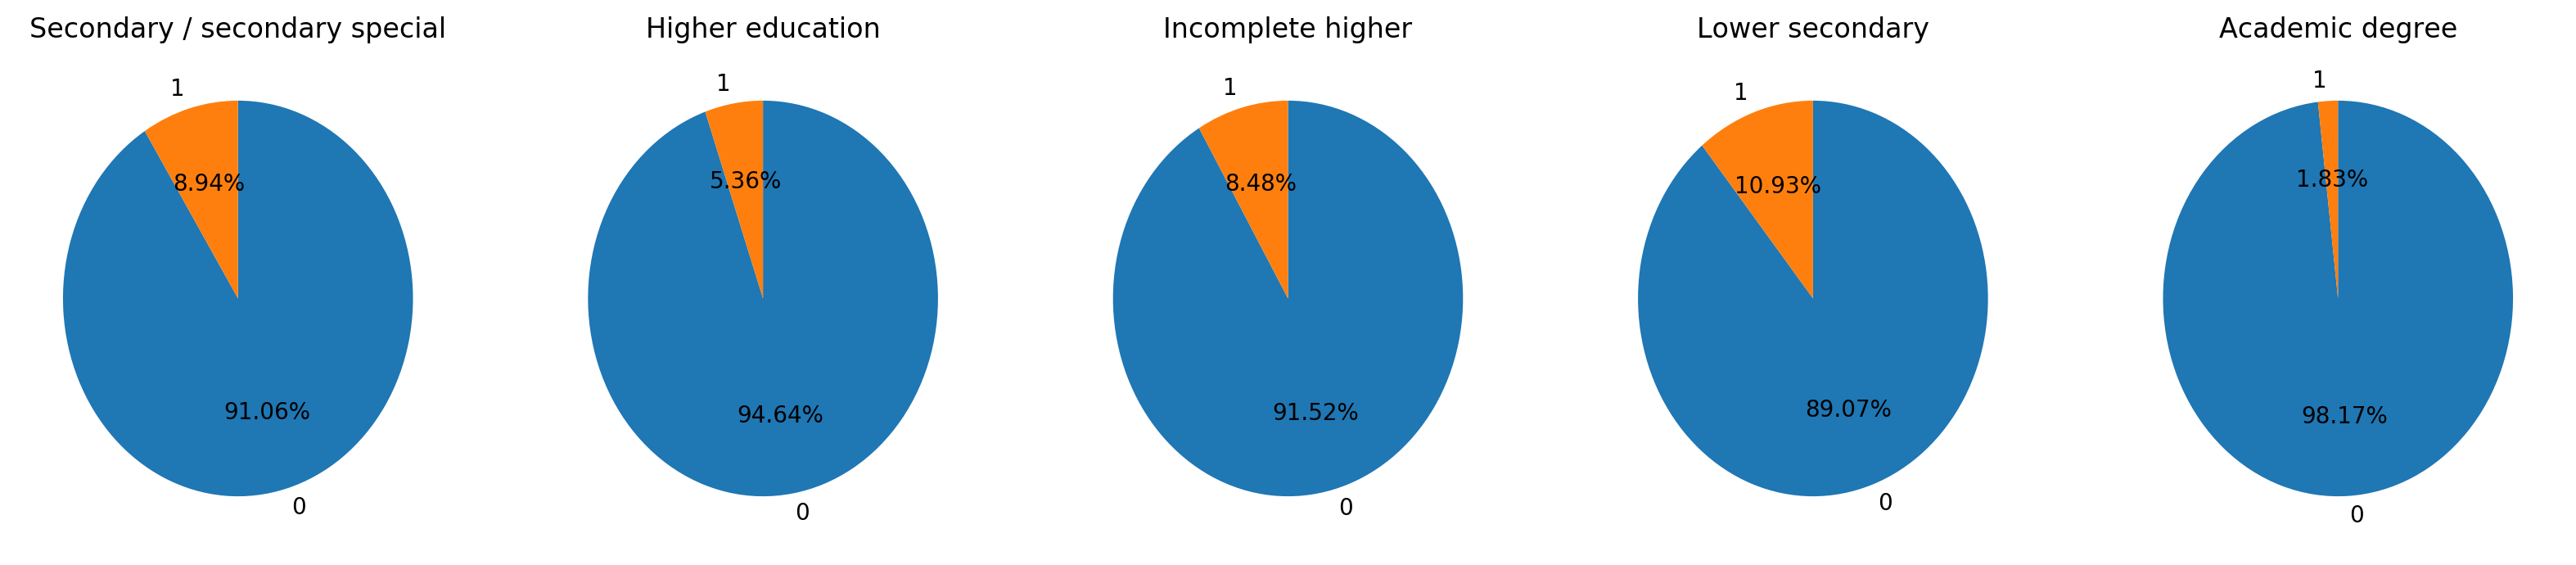

In [175]:
# 学歴の種類「NAME_EDUCATION_TYPE」の要素ごとに「TARGET」の要素の割合をグラフに描画

#1行 × ５列のグラフを設定
row = 1
col  = 5

plt.figure(figsize=(20, 4), dpi=200)

plt.subplot(row, col, 1)
plt.title('Secondary / secondary special')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_EDUCATION_TYPE']=='Secondary / secondary special','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 2)
plt.title('Higher education')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_EDUCATION_TYPE']=='Higher education','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 3)
plt.title('Incomplete higher')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_EDUCATION_TYPE']=='Incomplete higher','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 4)
plt.title('Lower secondary')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_EDUCATION_TYPE']=='Lower secondary','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 5)
plt.title('Academic degree')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_EDUCATION_TYPE']=='Academic degree','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

### データ結果：
### <font color="Tomato">学歴の種類「NAME_EDUCATION_TYPE」では「Higher education」「ncomplete higher」「Secondary / secondary special」「Lower secondary」の順に債務不履行の割合が低いことが分かる（なお、「Academic degree」はデータ数が少ないので対象外とする）</font>  

## ④　婚姻等の状況「NAME_FAMILY_STATUS」を基準に分析

In [176]:
# 婚姻等の状況「NAME_FAMILY_STATUS」の要素ごとに目的変数「TARGET」の要素の個数を表示
for column in df_preprocessed['NAME_FAMILY_STATUS'].unique():
    print("NAME_FAMILY_STATUS： {}".format(column))
    print(df_preprocessed.loc[df_preprocessed['NAME_FAMILY_STATUS']==column,'TARGET'].value_counts())
    print('\n')

NAME_FAMILY_STATUS： Single / not married
0    40987
1     4457
Name: TARGET, dtype: int64


NAME_FAMILY_STATUS： Married
0    181582
1     14850
Name: TARGET, dtype: int64


NAME_FAMILY_STATUS： Civil marriage
0    26814
1     2961
Name: TARGET, dtype: int64


NAME_FAMILY_STATUS： Widow
0    15151
1      937
Name: TARGET, dtype: int64


NAME_FAMILY_STATUS： Separated
0    18150
1     1620
Name: TARGET, dtype: int64


NAME_FAMILY_STATUS： Unknown
0    2
Name: TARGET, dtype: int64




### データ結果：<font color="Tomato">「Unknown」はデータ数自体が少ないので分析対象外とする</font>  

([<matplotlib.patches.Wedge at 0x1a1d2362b0>,
 [Text(0.280055,-1.06375,'0'), Text(-0.280055,1.06375,'1')],
 [Text(0.152757,-0.580229,'91.81%'), Text(-0.152757,0.580229,'8.19%')])

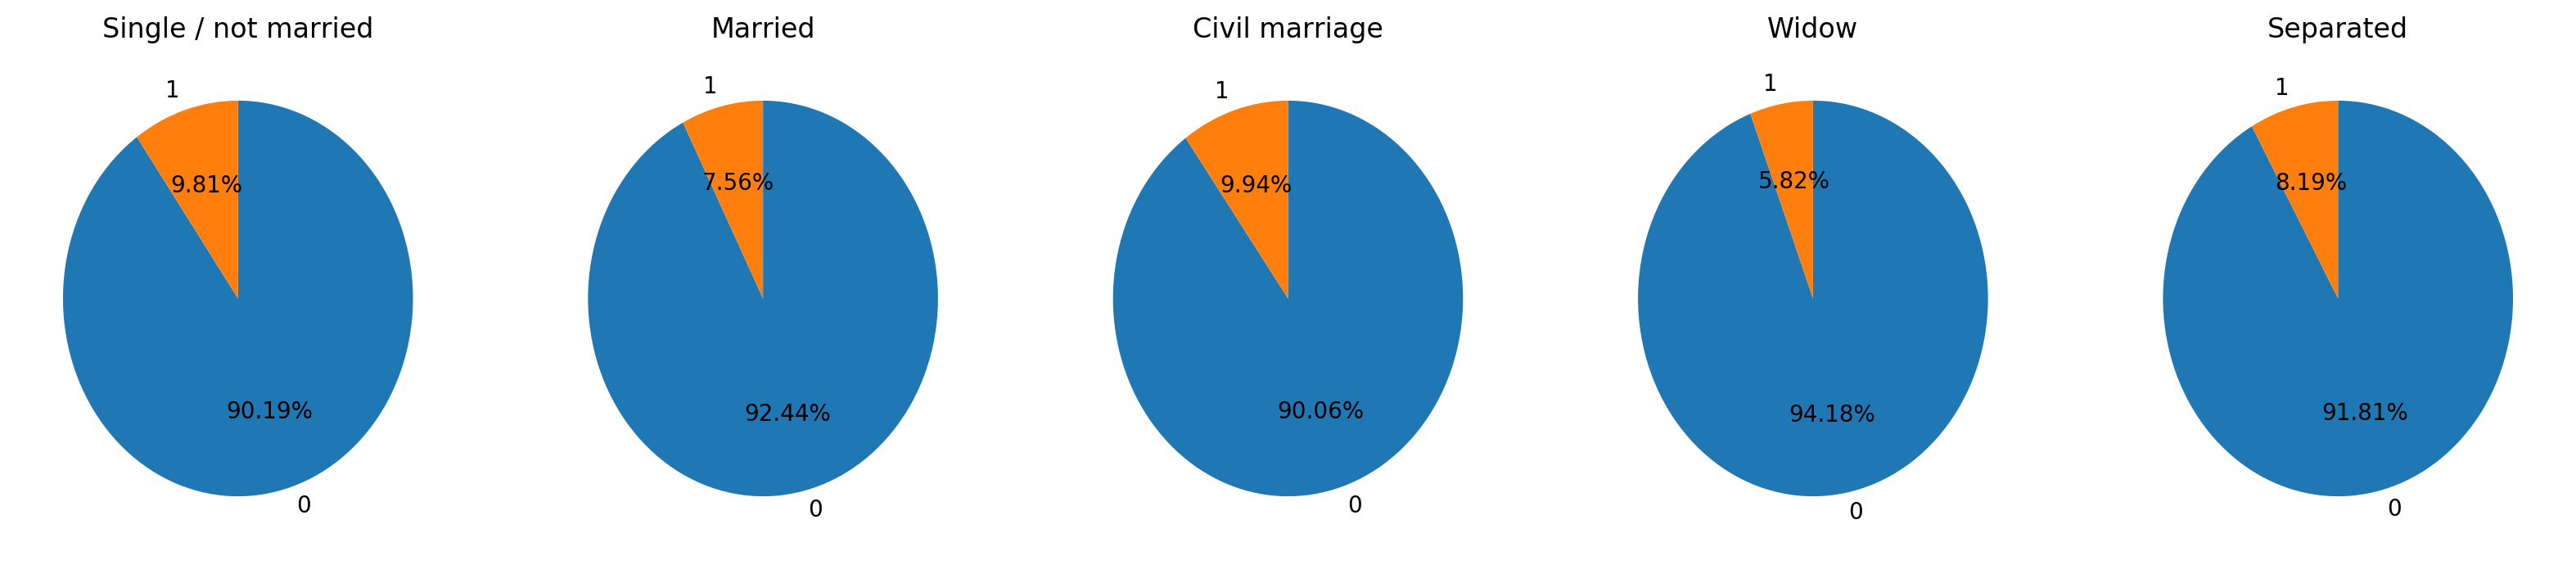

In [177]:
# 婚姻等の状況「NAME_FAMILY_STATUS」の要素ごとに「TARGET」の要素の割合をグラフに描画

#1行 × ５列のグラフを設定
row = 1
col  = 5

plt.figure(figsize=(20, 4), dpi=200)

plt.subplot(row, col, 1)
plt.title('Single / not married')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_FAMILY_STATUS']=='Single / not married','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 2)
plt.title('Married')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_FAMILY_STATUS']=='Married','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 3)
plt.title('Civil marriage')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_FAMILY_STATUS']=='Civil marriage','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 4)
plt.title('Widow')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_FAMILY_STATUS']=='Widow','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 5)
plt.title('Separated')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_FAMILY_STATUS']=='Separated','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

### データ結果：
### <font color="Tomato">婚姻等の状況「NAME_FAMILY_STATUS」では「Widow」「Married」「Separated」「Civil marriage」「Single / not married」の順に債務不履行の割合が低いことが分かる</font>  

## ⑤　住居の種類「NAME_HOUSING_TYPE」を基準に分析

In [178]:
# 住居の種類「NAME_HOUSING_TYPE」の要素ごとに目的変数「TARGET」の要素の個数を表示
for column in df_preprocessed['NAME_HOUSING_TYPE'].unique():
    print("NAME_HOUSING_TYPE： {}".format(column))
    print(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']==column,'TARGET'].value_counts())
    print('\n')

NAME_HOUSING_TYPE： House / apartment
0    251596
1     21272
Name: TARGET, dtype: int64


NAME_HOUSING_TYPE： Rented apartment
0    4280
1     601
Name: TARGET, dtype: int64


NAME_HOUSING_TYPE： With parents
0    13104
1     1736
Name: TARGET, dtype: int64


NAME_HOUSING_TYPE： Municipal apartment
0    10228
1      955
Name: TARGET, dtype: int64


NAME_HOUSING_TYPE： Office apartment
0    2445
1     172
Name: TARGET, dtype: int64


NAME_HOUSING_TYPE： Co-op apartment
0    1033
1      89
Name: TARGET, dtype: int64




### データ結果：
### <font color="Tomato">「Office apartment」「Co-op apartment」はデータ数自体が少ないのでデータとしての価値が低いことに留意する</font>  

([<matplotlib.patches.Wedge at 0x1a21effeb8>,
 [Text(0.271291,-1.06602,'0'), Text(-0.271291,1.06602,'1')],
 [Text(0.147977,-0.581466,'92.07%'), Text(-0.147977,0.581466,'7.93%')])

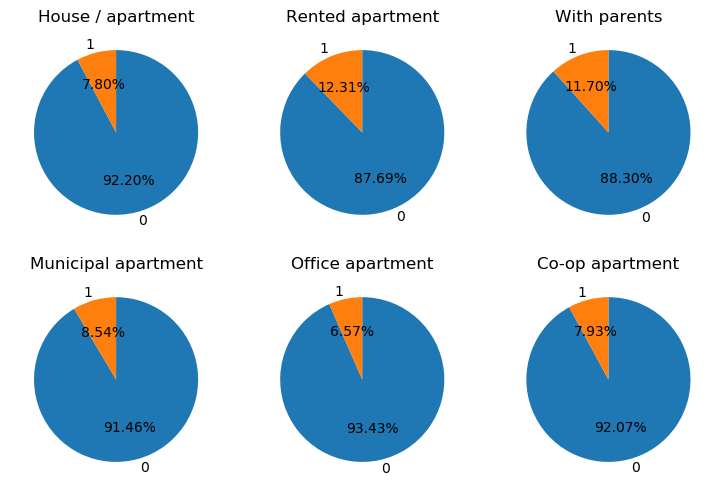

In [186]:
# 住居の種類「NAME_HOUSING_TYPE」の要素ごとに「TARGET」の要素の割合をグラフに描画

#1行 × ５列のグラフを設定
row = 2
col  = 3

plt.figure(figsize=(9, 6), dpi=100)

plt.subplot(row, col, 1)
plt.title('House / apartment')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']=='House / apartment','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 2)
plt.title('Rented apartment')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']=='Rented apartment','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 3)
plt.title('With parents')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']=='With parents','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 4)
plt.title('Municipal apartment')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']=='Municipal apartment','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 5)
plt.title('Office apartment')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']=='Office apartment','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

plt.subplot(row, col, 6)
plt.title('Co-op apartment')
plt.pie(df_preprocessed.loc[df_preprocessed['NAME_HOUSING_TYPE']=='Co-op apartment','TARGET'].value_counts(), labels=['0', '1'], counterclock=False, startangle=90, autopct="%1.2f%%")

### データ結果：
### <font color="Tomato">住居の種類「NAME_HOUSING_TYPE」では「Office apartment」「House / apartment」「Co-op apartment」「Municipal apartment」「With parents」「Rented apartment」の順に債務不履行の割合が低いことが分かる</font>  